# Euroleague New Format (2016-2017 to 2023-2024) Fouls Drawn Analysis

## Project Description

<div style="text-align: justify;">
The goal of this project is to take a look at historical Euroleague data related to fouls drawn per season. We will try to give some insights and investigate if there are any specific patterns around this data. Bad referee's calls cannot be proven and the scientific approach of this project will be shaked if claiming such a thing. However, we can investigate patterns related to the general referee's decisions for each year. Additionally, this project is giving the opportunity to study some strange data cases rarely occurred through the years.
</div>

## Imported Datasets Description

<div style="text-align: justify;">
Each Excel dataset includes the 50 most fouled players of the corresponding Euroleague season. For instance, "fouls_23_24.xlsx" includes the 50 most fouled players of the Euroleague 2023-2024 season. The raw total fouls were counted for this datalist, and no normalizations were made prior to this project. The columns "Player", "Team", "Fouled (Total)", "Games" were acquired from https://basketnews.com/leagues/25-euroleague/statistics.html. The rest of the Excel columns, i.e., "Minutes per Game" and "Position" were manually completed by myself looking at Euroleague's official site https://www.euroleaguebasketball.net/euroleague/?geoip=disabled.
</div>

## Ensure the Correct Environment - Import Libraries - Read Excel Datafiles

In [1]:
# Check the environment the jupyter server is running in:
import sys
sys.executable

'C:\\Users\\Adespotos\\anaconda3\\envs\\Lessort\\python.exe'

In [2]:
# Import Libraries
from scipy.stats import t
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Create the list of Excel files:
excel_datafiles = ["fouls_23_24.xlsx", "fouls_22_23.xlsx", "fouls_21_22.xlsx", "fouls_20_21.xlsx", "fouls_19_20.xlsx"]

# Create an empty list:
df_list = []

# Iterate through the Excel datalist and read each file into a Pandas DataFrame (df):
df_list = [pd.read_excel(file) for file in excel_datafiles]

# Create the df with most fouled players of all seasons combined:
combined_df = pd.concat(df_list, ignore_index=True)

# Create the 2023-2024 season df:
df_2324 = pd.read_excel(excel_datafiles[0])

# Create the 2022-2023 season df:
df_2223 = pd.read_excel(excel_datafiles[1])

# Create the 2023-2024 season df:
df_2122 = pd.read_excel(excel_datafiles[2])

# Create the 2023-2024 season df:
df_2021 = pd.read_excel(excel_datafiles[3])

# Create the 2023-2024 season df:
df_1920 = pd.read_excel(excel_datafiles[4])

## Euroleague 2023-2024 Season

### Data Cleaning and Feature Engineering

In [4]:
# Split the "minutes_per_game" column to two columns:
df_2324[["minutes", "seconds"]] = df_2324["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
df_2324["minutes"] = df_2324["minutes"].astype(int)
df_2324["seconds"] = df_2324["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
df_2324["Seconds per Game"] = (df_2324["minutes"]*60 + df_2324["seconds"]).astype("int64")

# Drop the unecessary columns:
df_2324 = df_2324.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
df_2324["Fouled per Game"] = df_2324["Fouled (Total)"] / df_2324["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
df_2324["Fouled per 40 Minutes"] = round(2400 * df_2324["Fouled per Game"] / df_2324["Seconds per Game"], 2)

In [5]:
# Check the above cell's code:
print(df_2324.info())
df_2324.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 50 non-null     object 
 1   Fouled (Total)         50 non-null     int64  
 2   Team                   50 non-null     object 
 3   Games                  50 non-null     int64  
 4   Position               50 non-null     int64  
 5   Seconds per Game       50 non-null     int64  
 6   Fouled per Game        50 non-null     float64
 7   Fouled per 40 Minutes  50 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.3+ KB
None


,Player,Fouled (Total),Team,Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
0,Mathias Lessort,274,Panathinaikos AKTOR Athens,41,5,1780,6.682927,9.01
1,Mike James,182,AS Monaco,39,1,1900,4.666667,5.89
2,Tornike Shengelia,170,Virtus Segafredo Bologna,33,4,1645,5.151515,7.52
3,Facundo Campazzo,166,Real Madrid,37,1,1517,4.486486,7.10
4,Wade Baldwin IV,165,Maccabi Playtika Tel Aviv,30,1,1653,5.500000,7.99


The code is correct. The same code will be used for the other data frames as well.

### Exploratory Data Analysis and Descriptive Statistics

In [6]:
# Present some basic statistics:
df_2324.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),50.0,114.520000,34.595765,86.00,93.000000,102.500000,117.000000,274.000000
Games,50.0,34.440000,4.253018,25.00,31.250000,34.000000,38.000000,41.000000
Position,50.0,3.060000,1.544047,1.00,2.000000,3.000000,4.750000,5.000000
Seconds per Game,50.0,1480.660000,248.154298,937.00,1333.500000,1487.000000,1672.500000,1900.000000
Fouled per Game,50.0,3.349626,0.940605,2.15,2.692645,3.052632,3.828721,6.682927
Fouled per 40 Minutes,50.0,5.517000,1.490042,3.23,4.445000,5.270000,6.245000,9.010000


In [7]:
# Select the numerical columns:
num_cols_2324 = df_2324.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_2324.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.229907,-0.007855,0.324299,0.894435,0.645094
Games,0.229907,1.000000,0.058053,0.020719,-0.214552,-0.233942
Position,-0.007855,0.058053,1.000000,-0.346418,-0.046386,0.184053
Seconds per Game,0.324299,0.020719,-0.346418,1.000000,0.326110,-0.358592
Fouled per Game,0.894435,-0.214552,-0.046386,0.326110,1.000000,0.753514
Fouled per 40 Minutes,0.645094,-0.233942,0.184053,-0.358592,0.753514,1.000000


#### Correlation Matrix Observations


<div style="text-align: justify">
Ιt is worth mentioning that there is a negative linear correlation (although weak) between the time-normalized fouls per 40 minutes and both the number of games and the seconds per game. This indicates that as a player participates in more games throughout the season and spends more time on the court, his fouls per 40 minutes tend to decrease. In the context of basketball, this could be due to factors such as fatigue, opponent adaptation and changes of referees' decisions throughout the season or throughout the minutes a player is on the court.
</div>

<div style="text-align: justify">
Another interesting fact is that there is a weak negative correlation indicating that as the player's height increased the time spent on the court decreased. Watching the Euroleague 2023-2024 season this is not strange. There was a significant try of coaches to rotate the tall players, especially the centers. A basic exception to this rule was Panathinaikos AKTOR Athens where Mathias Lessort lift on his shoulders the center's position during the whole season.
</div>

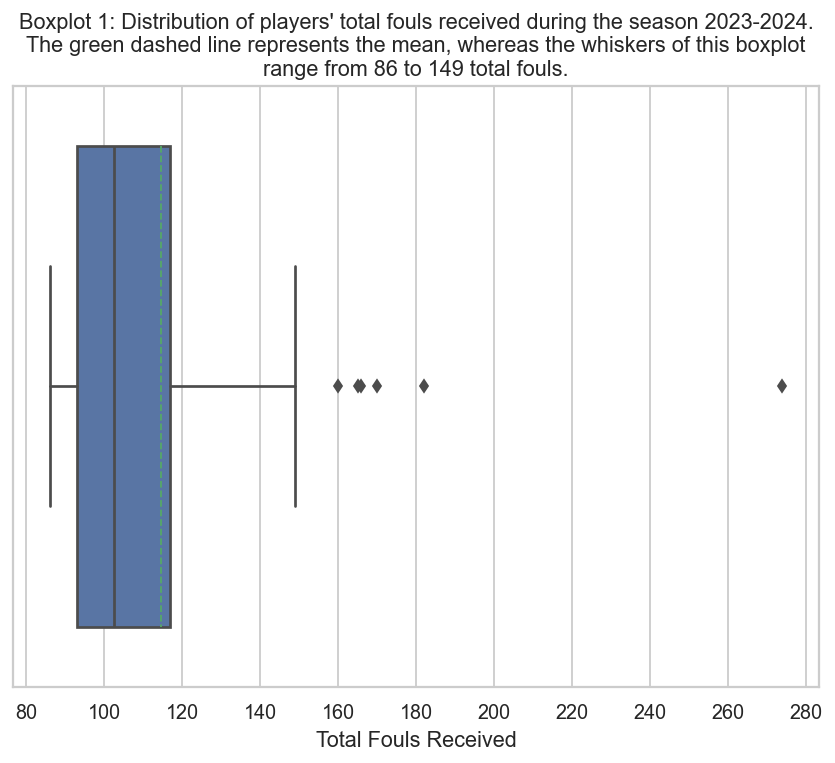

In [8]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2324["Fouled (Total)"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(80, 281, 20))
plt.title(
    "Boxplot 1: Distribution of players' total fouls received during the season 2023-2024.\n"
    "The green dashed line represents the mean, whereas the whiskers of this boxplot\n"
    "range from 86 to 149 total fouls.")
plt.xlabel("Total Fouls Received");

<div style="text-align: justify">
Boxplot 1 indicates that there are 6 players identified as outliers based on the total fouls gained during the season. One of these players exhibits an extreme deviation from the overall distribution. Since these observations represent raw data, further analysis is required before drawing definitive conclusions. The players identified as outliers are Mathias Lessort, Mike James, Tornike Shengelia, Facundo Campazzo, and Wade Baldwin IV. Additionally, the distribution displays clear right skewness. In the context of basketball, where exceptional players may effectively draw many fouls, it isn't unexpected to observe such a right skewness and a wide data spread to the higher end of this figure.
</div>

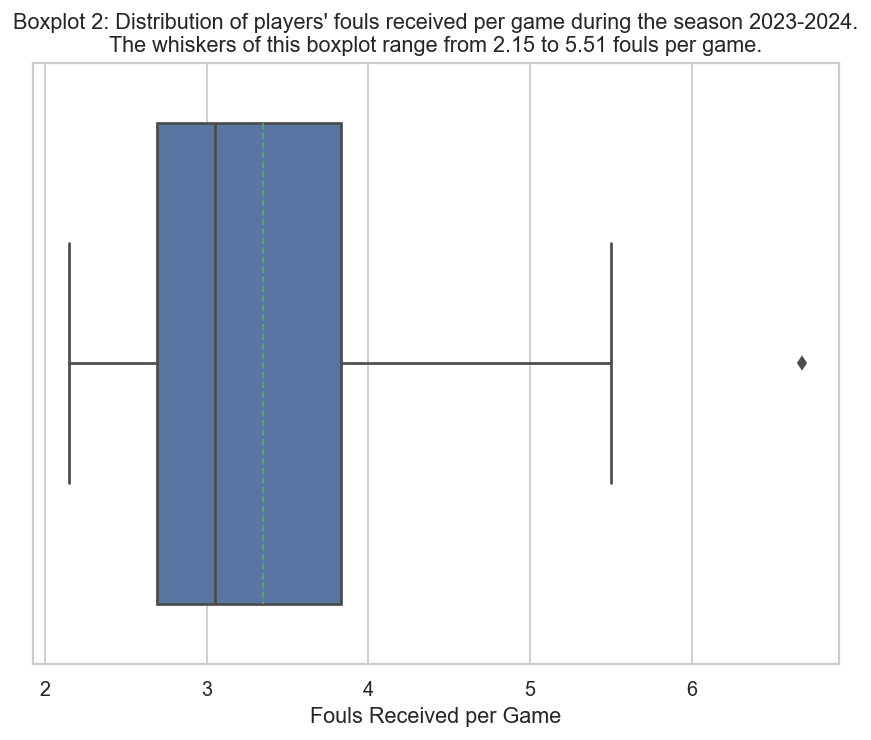

In [9]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2324["Fouled per Game"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(2, 7, 1))
plt.title(
    "Boxplot 2: Distribution of players' fouls received per game during the season 2023-2024.\n"
    "The whiskers of this boxplot range from 2.15 to 5.51 fouls per game.")

plt.xlabel("Fouls Received per Game");

<div style="text-align: justify">
The importance of normalization is evident in boxplot 2. The boxplot 1, which used raw data, identified six outliers, with one exhibiting an extreme deviation from the rest of the data. However, boxplot 2, which represents game-normalized fouls drawn, indicates only one outlier and this outlier isn't as extreme as before. The player still identified as an outlier is Mathias Lessort.
</div>

#### Critical Boxplot: Time-Normalized Foules (Foules Drawn per 40 Minutes) 2023-2024 Season

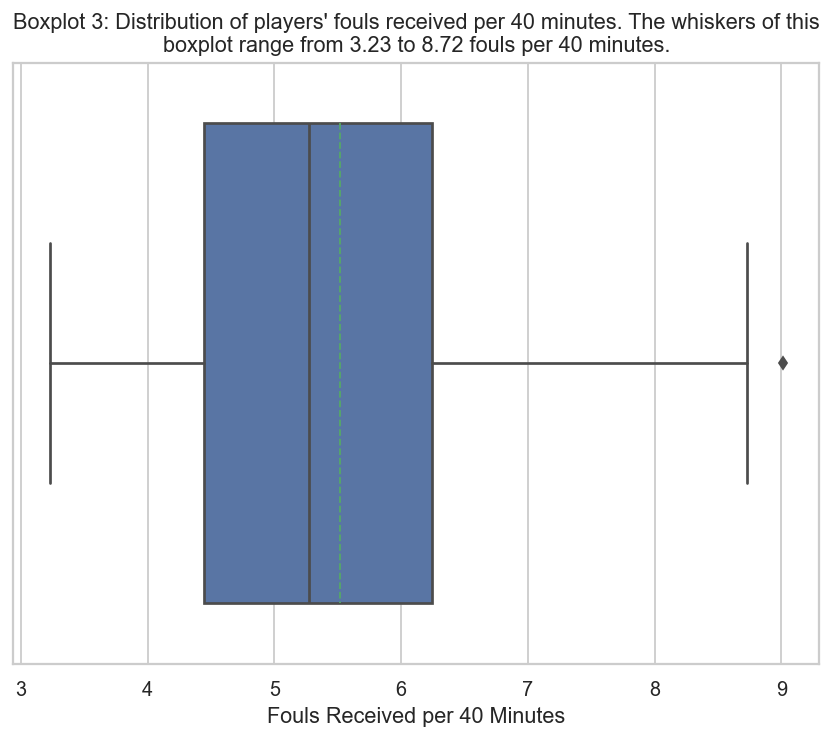

In [10]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2324["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 3: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.23 to 8.72 fouls per 40 minutes.")

plt.xlabel("Fouls Received per 40 Minutes");

<div style="text-align: justify">
Boxplot 3 represents the distribution of time-normalized fouls drawn per 40 minutes. This indicator highlights that while the outlier remains, it is even less extreme than before. Additionally, increased normalization makes the distribution more similar to a normal distribution. The player still identified as an outlier is Mathias Lessort.
</div>

<div style="text-align: justify">
An interesting estimator defining the quality of the general referees' approach each Euroleague season may be the range between the max and min value of "fouls per 40 minutes" column, excluding the outliers. A small range may indicate a robust referees approach for calling decisions. Specifically, the smaller this range, the less the discriminations between the most fouled players of the season. Additionally, the existence or not of outliers in the above boxplot may be negatively affecting the referees' approach through the season, especially if the outlier has spent so much time on the court and having played so many games as Mathias Lessort.
</div>

  For 2023-2024 season, the range is $5.49$ fouls per 40 minutes and there is identified outlier.

In [11]:
# Create a new df without "Lesort" observation:
df_no_lessort = df_2324.drop(index=0)

# Create a table with means per position excluding Lessort from the dataset:
df_no_lessort.groupby("Position").mean("Fouls per 40 Minutes").transpose()

Position,1,2,3,4,5
Fouled (Total),124.454545,106.545455,98.200000,115.500000,105.416667
Games,33.909091,34.818182,35.000000,33.100000,34.916667
Seconds per Game,1547.181818,1537.454545,1597.800000,1533.800000,1249.583333
Fouled per Game,3.663552,3.108308,2.909548,3.534887,3.034276
Fouled per 40 Minutes,5.767273,4.884545,4.382000,5.563000,6.010833


<div style="text-align: justify">
The data in this table support the possibility of an outlier originating from position number 5, given its higher mean of fouls drawn per 40 minutes of play. However, as stated before, the high mean of fouls drawn per 40 minutes from position 5 players could be due to increased rotation and hence decreased time on the court. Apart from the weak linear correlation between the time played as well as the number of games and the fouls drawn per 40 minutes, it will be shown in next sections how decreased time on the court or small number of games played affects the fouls drawn per 40 games, where in some cases might be very high.
</div>

## Euroleague 2022-2023 Season

## Data Cleaning and Feature Engineering

In [12]:
# Split the "minutes_per_game" column to two columns:
df_2223[["minutes", "seconds"]] = df_2223["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
df_2223["minutes"] = df_2223["minutes"].astype(int)
df_2223["seconds"] = df_2223["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
df_2223["Seconds per Game"] = (df_2223["minutes"]*60 + df_2223["seconds"]).astype("int64")

# Drop the unecessary columns:
df_2223 = df_2223.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
df_2223["Fouled per Game"] = df_2223["Fouled (Total)"] / df_2223["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
df_2223["Fouled per 40 Minutes"] = round(2400 * df_2223["Fouled per Game"] / df_2223["Seconds per Game"], 2)

## Exploratory Data Analysis and Descriptive Statistics

In [13]:
# Present some basic statistics of the df:
df_2223.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),50.0,118.500000,26.169970,86.000000,102.000000,107.500000,135.500000,193.000000
Games,50.0,34.360000,4.552461,23.000000,31.250000,34.000000,38.000000,41.000000
Position,50.0,2.860000,1.511993,1.000000,1.250000,3.000000,4.000000,5.000000
Seconds per Game,50.0,1457.180000,248.656200,1067.000000,1267.250000,1425.500000,1625.750000,1987.000000
Fouled per Game,50.0,3.468844,0.685988,2.146341,2.981707,3.364919,3.800113,5.078947
Fouled per 40 Minutes,50.0,5.798400,1.142493,3.830000,4.865000,5.690000,6.617500,8.370000


In [14]:
# Select the numerical columns:
num_cols_2223 = df_2223.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_2223.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.394501,-0.054413,0.524296,0.801238,0.306808
Games,0.394501,1.000000,0.250592,0.169445,-0.225286,-0.400504
Position,-0.054413,0.250592,1.000000,-0.180582,-0.213304,-0.040182
Seconds per Game,0.524296,0.169445,-0.180582,1.000000,0.452186,-0.444985
Fouled per Game,0.801238,-0.225286,-0.213304,0.452186,1.000000,0.583426
Fouled per 40 Minutes,0.306808,-0.400504,-0.040182,-0.444985,0.583426,1.000000


<div style="text-align: justify">
The same patters are observed in this correlation matrix as well. Fouls drawn per 40 minuted tend to decrease the more minutes a player spends on the court and the more games he plays. There is a descent amount of rotation in tall players as well. However, the correlation matrix shows that tall players tend to participate in more games than the shorter players. This may be due to injuries affected most fouled and shorter players as there is not normal to observe an influence of the number of games to the position of the players.
</div>

#### Critical Boxplot: Time-Normalized Foules (Foules Drawn per 40 Minutes) 2022-2023 Season

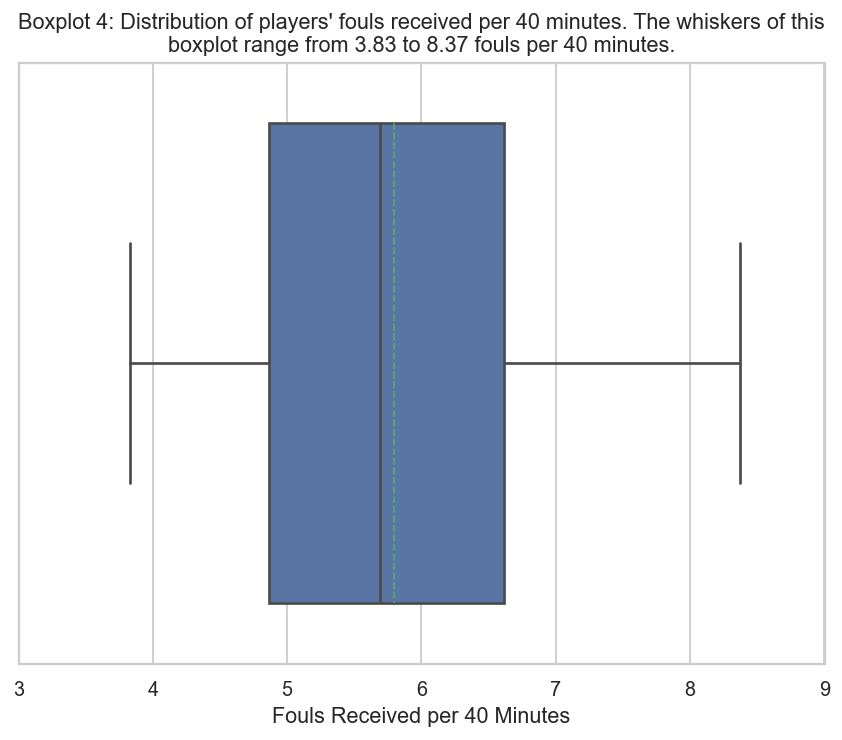

In [15]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2223["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 4: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.83 to 8.37 fouls per 40 minutes.")

plt.xlabel("Fouls Received per 40 Minutes");

For 2022-2023 season, the range is $4.54$ fouls per 40 minutes and there is no identified outlier.

## Euroleague 2021-2022 Season

## Data Cleaning and Feature Engineering

In [16]:
# Split the "minutes_per_game" column to two columns:
df_2122[["minutes", "seconds"]] = df_2122["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
df_2122["minutes"] = df_2122["minutes"].astype(int)
df_2122["seconds"] = df_2122["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
df_2122["Seconds per Game"] = (df_2122["minutes"]*60 + df_2122["seconds"]).astype("int64")

# Drop the unecessary columns:
df_2122 = df_2122.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
df_2122["Fouled per Game"] = df_2122["Fouled (Total)"] / df_2122["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
df_2122["Fouled per 40 Minutes"] = round(2400 * df_2122["Fouled per Game"] / df_2122["Seconds per Game"], 2)

## Exploratory Data Analysis and Descriptive Statistics

In [17]:
# Present some basic statistics of the df:
df_2122.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),50.0,103.120000,26.565775,77.000000,84.750000,94.000000,107.750000,192.000000
Games,50.0,32.400000,4.886466,20.000000,30.250000,32.500000,36.750000,39.000000
Position,50.0,2.760000,1.505907,1.000000,1.000000,3.000000,4.000000,5.000000
Seconds per Game,50.0,1494.040000,231.287078,921.000000,1375.250000,1475.500000,1676.000000,1913.000000
Fouled per Game,50.0,3.212448,0.723359,2.108108,2.631579,3.185714,3.520833,5.052632
Fouled per 40 Minutes,50.0,5.204200,1.047917,3.140000,4.455000,5.065000,5.885000,8.560000


In [18]:
# Select the numerical columns:
num_cols_2122 = df_2122.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_2122.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.398156,-0.264024,0.384934,0.763683,0.491127
Games,0.398156,1.000000,0.090967,-0.162171,-0.278093,-0.210809
Position,-0.264024,0.090967,1.000000,-0.245892,-0.335724,-0.169926
Seconds per Game,0.384934,-0.162171,-0.245892,1.000000,0.514116,-0.273814
Fouled per Game,0.763683,-0.278093,-0.335724,0.514116,1.000000,0.666876
Fouled per 40 Minutes,0.491127,-0.210809,-0.169926,-0.273814,0.666876,1.000000


Same observations as before can be made here.

#### Critical Boxplot: Time-Normalized Foules (Foules Drawn per 40 Minutes) 2021-2022 Season

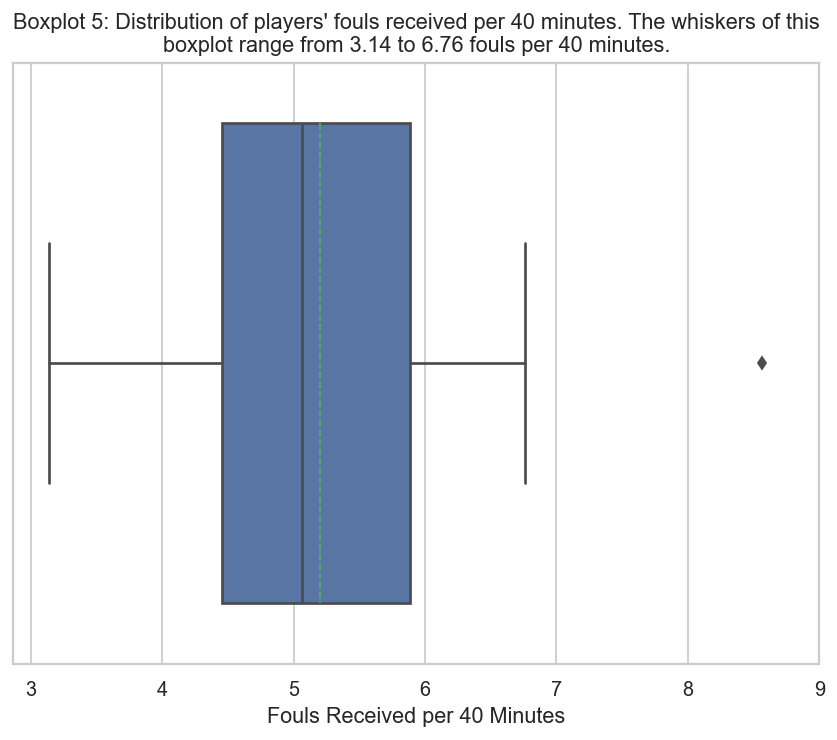

In [19]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2122["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 5: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.14 to 6.76 fouls per 40 minutes.")

plt.xlabel("Fouls Received per 40 Minutes");

<div style="text-align: justify">
Nikola Ivanovic has been identified as an outlier in the analysis. Ranked 30th among the most fouled players and having played only 15:21 minutes per game, Ivanovic’s value needs some study. Specifically, he very often drew approximately 10 or more fouls per 40 minutes, while staying between 9 to 17 minutes on the court. Ivanovic’s high foul rate appears to be influenced by his mediocre time on the court. As a result, his fouls-per-40-minutes value would not probably be the same, if he spent more minutes on the court. Therefore, it is likely that Ivanovic's high foul rate is a result of his adaptability to the game (approximately after 8-9 minutes on the court) and his mediocre time playing basketball (< 17 minutes). He may be highly skilled at drawing fouls when playing less than 20 minutes. However, being such an extreme outlier, even on time-normalized fouls, questioning referees decision, even if Ivanovic may be highly skilled in drawing fouls.
</div>

 For 2021-2022 season, the range is $3.62$ fouls per 40 minutes and there is an identified outlier.

## Euroleague 2020-2021 Season

## Data Cleaning and Feature Engineering

In [20]:
# Split the "minutes_per_game" column to two columns:
df_2021[["minutes", "seconds"]] = df_2021["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
df_2021["minutes"] = df_2021["minutes"].astype(int)
df_2021["seconds"] = df_2021["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
df_2021["Seconds per Game"] = (df_2021["minutes"]*60 + df_2021["seconds"]).astype("int64")

# Drop the unecessary columns:
df_2021 = df_2021.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
df_2021["Fouled per Game"] = df_2021["Fouled (Total)"] / df_2021["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
df_2021["Fouled per 40 Minutes"] = round(2400 * df_2021["Fouled per Game"] / df_2021["Seconds per Game"], 2)

## Exploratory Data Analysis and Descriptive Statistics

In [21]:
# Present some basic statistics of the df:
df_2021.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),50.0,116.740000,27.726661,83.000,93.750000,113.000000,130.000000,198.0000
Games,50.0,33.420000,3.938766,23.000,31.000000,34.000000,36.000000,41.0000
Position,50.0,2.640000,1.481312,1.000,1.000000,2.000000,4.000000,5.0000
Seconds per Game,50.0,1507.340000,203.051980,1057.000,1359.750000,1534.500000,1633.500000,1952.0000
Fouled per Game,50.0,3.526349,0.842258,2.125,2.819519,3.394841,4.189279,5.3125
Fouled per 40 Minutes,50.0,5.637600,1.202845,3.390,4.677500,5.825000,6.350000,8.7700


In [22]:
# Select the numerical columns:
num_cols_2021 = df_2021.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_2021.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.179297,-0.168783,0.407650,0.855677,0.673378
Games,0.179297,1.000000,0.187343,-0.126009,-0.341597,-0.322034
Position,-0.168783,0.187343,1.000000,-0.267864,-0.234875,-0.067041
Seconds per Game,0.407650,-0.126009,-0.267864,1.000000,0.469620,-0.140735
Fouled per Game,0.855677,-0.341597,-0.234875,0.469620,1.000000,0.802287
Fouled per 40 Minutes,0.673378,-0.322034,-0.067041,-0.140735,0.802287,1.000000


Same observations as before can be made here.

#### Critical Boxplot: Time-Normalized Foules (Foules Drawn per 40 Minutes) 2020-2021 Season

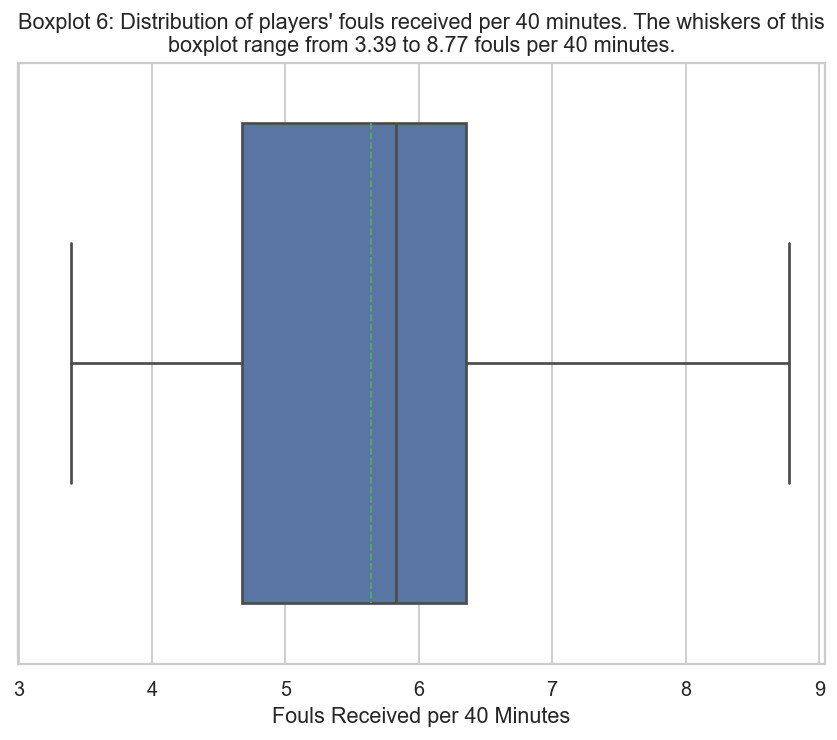

In [23]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2021["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 6: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.39 to 8.77 fouls per 40 minutes.")

plt.xlabel("Fouls Received per 40 Minutes");

For 2020-2021 season, the range is $5.38$ fouls per 40 minutes and there is no identified outlier.

## Euroleague 2019-2020 Season

## Data Cleaning and Feature Engineering

In [24]:
# Split the "minutes_per_game" column to two columns:
df_1920[["minutes", "seconds"]] = df_1920["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
df_1920["minutes"] = df_1920["minutes"].astype(int)
df_1920["seconds"] = df_1920["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
df_1920["Seconds per Game"] = (df_1920["minutes"]*60 + df_1920["seconds"]).astype("int64")

# Drop the unecessary columns:
df_1920 = df_1920.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
df_1920["Fouled per Game"] = df_1920["Fouled (Total)"] / df_1920["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
df_1920["Fouled per 40 Minutes"] = round(2400 * df_1920["Fouled per Game"] / df_1920["Seconds per Game"], 2)

## Exploratory Data Analysis and Descriptive Statistics

In [25]:
# Present some basic statistics of the df:
df_1920.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),50.0,87.140000,23.758144,66.000000,71.000000,77.000000,97.250000,166.000000
Games,50.0,26.180000,2.413313,18.000000,25.250000,27.000000,28.000000,28.000000
Position,50.0,2.800000,1.577909,1.000000,1.000000,3.000000,4.000000,5.000000
Seconds per Game,50.0,1472.500000,238.561441,813.000000,1326.750000,1490.500000,1645.750000,1931.000000
Fouled per Game,50.0,3.345674,0.890171,2.357143,2.662143,2.960769,3.903533,5.928571
Fouled per 40 Minutes,50.0,5.487400,1.227232,3.440000,4.495000,5.275000,6.345000,9.100000


In [26]:
# Select the numerical columns:
num_cols_1920 = df_1920.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_1920.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.158301,-0.232781,0.532936,0.929453,0.624974
Games,0.158301,1.000000,-0.049306,-0.000727,-0.213631,-0.292005
Position,-0.232781,-0.049306,1.000000,-0.200326,-0.204899,-0.042430
Seconds per Game,0.532936,-0.000727,-0.200326,1.000000,0.527614,-0.178030
Fouled per Game,0.929453,-0.213631,-0.204899,0.527614,1.000000,0.728753
Fouled per 40 Minutes,0.624974,-0.292005,-0.042430,-0.178030,0.728753,1.000000


Same observations as before can be made here.

#### Critical Boxplot: Time-Normalized Foules (Foules Drawn per 40 Minutes) 2019-2020 Season

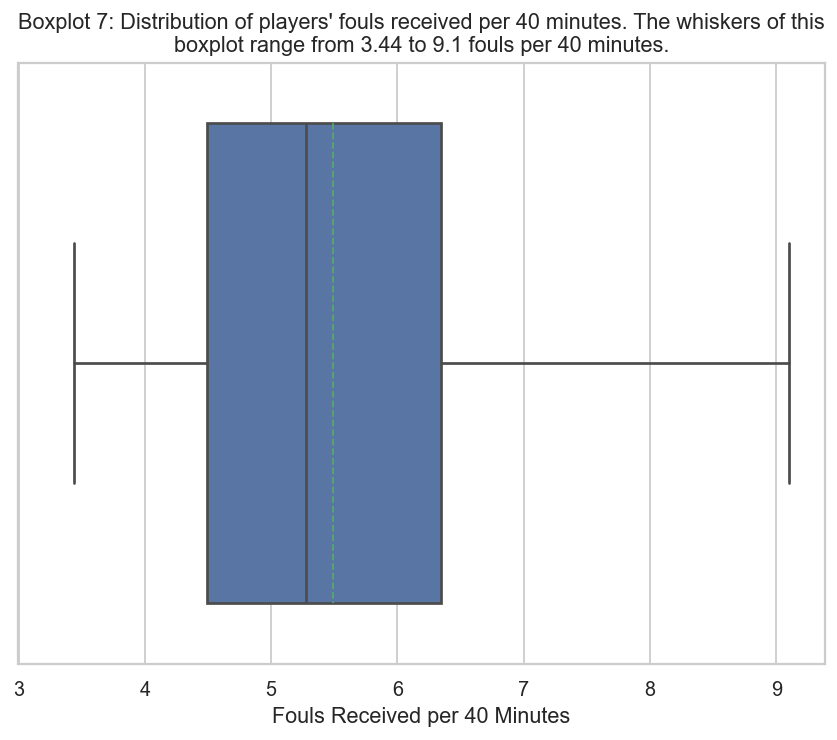

In [27]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=130)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_1920["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 7: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.44 to 9.1 fouls per 40 minutes.")

plt.xlabel("Fouls Received per 40 Minutes");

<div style="text-align: justify">
Arturas Gudaitis has a "fouls per 40 minutes" rate of 9.1. Although he isn't classified as an outlier, this value is the highest observed so far and it needs some further investigation. This case is probably similar to Ivanovic's situation because Gudaitis ranked 30th among the 50 most fouled players of the season, playing only in 19 games with an average of only 16:53 minutes per game. Checking Gudaitis stats reveals he drew 33 out of his total 73 fouls in just 5 games, where he played approximately 17.5 minutes per game. These 5 games significantly affects his overall "fouls per 40 minutes" rates, leading it to such high levels. Gudaitis high rate of fouls-per-40-minutes would probably be smaller if he played more games or spent more minutes on the court.
</div>

<div style="text-align: justify">
For 2019-2020 season, the range is $5.66$ fouls per 40 minutes and there is no identified outliers. However, Gudaitis' extremities might be a referees headache.
</div>

# Part II: Isolate the Players Averaged more than 25 Minutes on the Court 

<div style="text-align: justify">
Considering the effects observed with Ivanovic and Gudaitis, we will exclude the players who did not spend sufficient time on the court. Consequently, the datasets presented below include only players who averaged more than 25 minutes per game among the 50 most fouled players of each season.
</div>

## Euroleague 2023-2024 Season: Players Over 25 Minutes on the Court

In [28]:
# Create a new df with players averaged over 25 minutes:
df_2324_over25 = df_2324[df_2324["Seconds per Game"] > 1500]

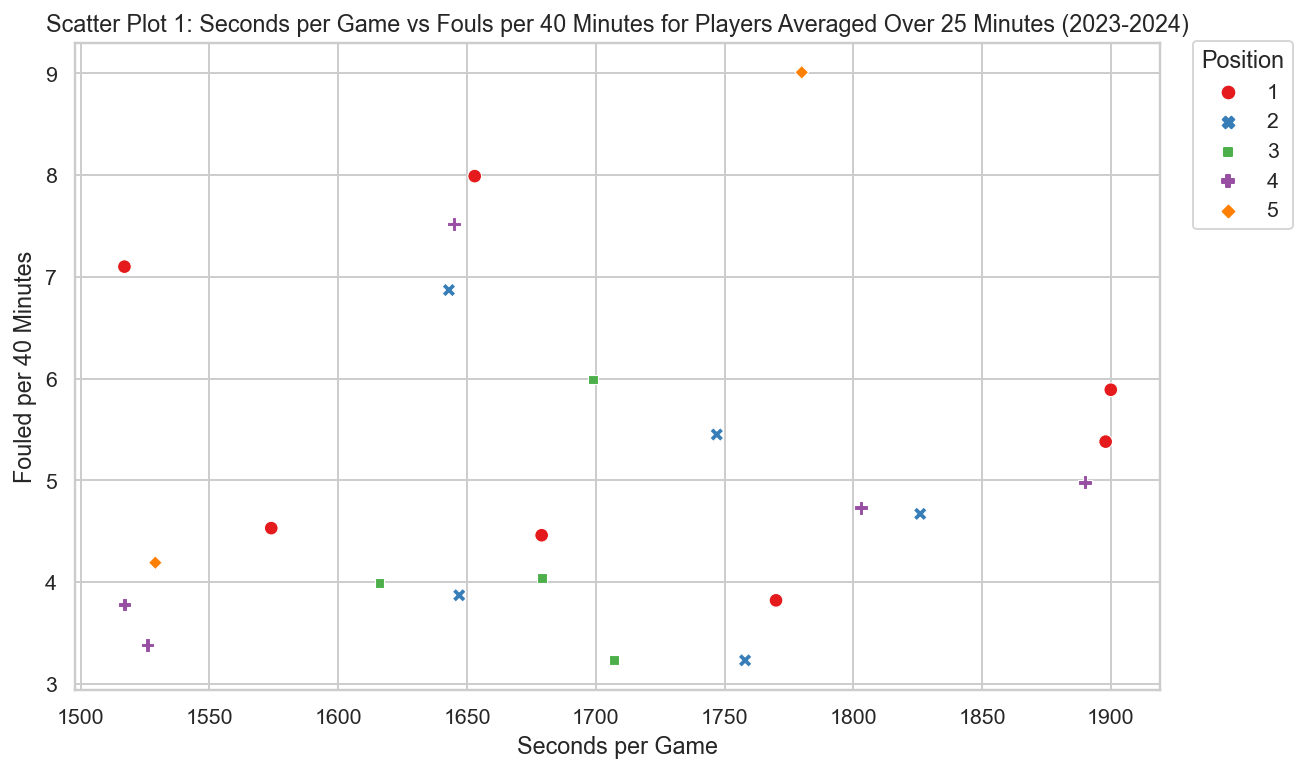

In [29]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=df_2324_over25["Seconds per Game"], 
                y=df_2324_over25["Fouled per 40 Minutes"], 
                hue=df_2324_over25["Position"],
                style=df_2324_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 1: Seconds per Game vs Fouls per 40 Minutes for Players Averaged Over 25 Minutes (2023-2024)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

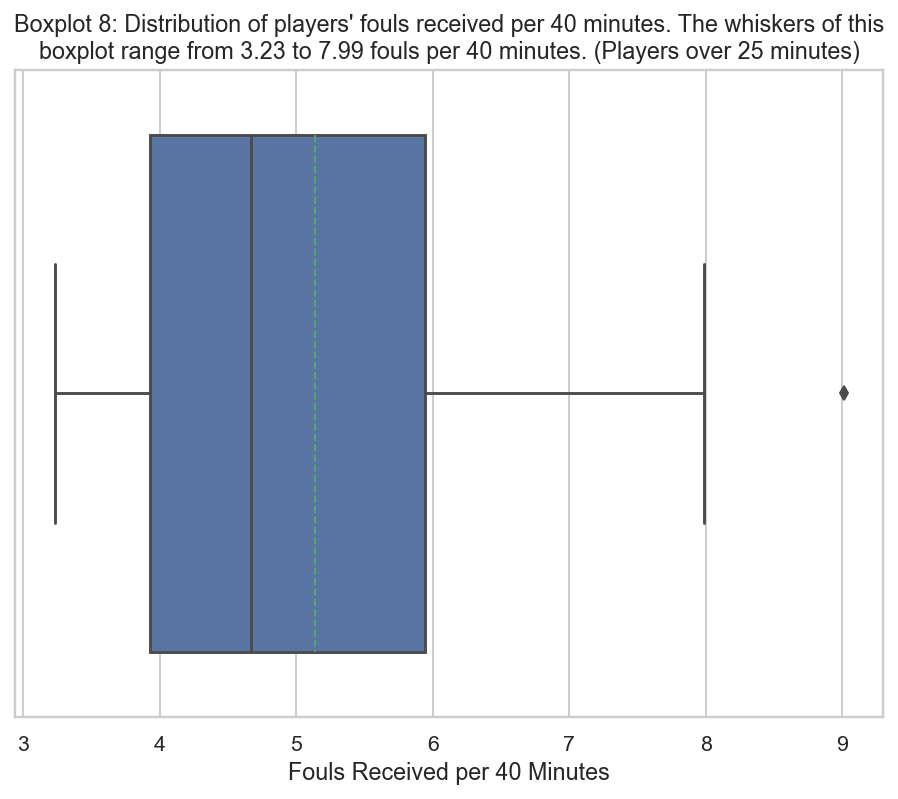

In [30]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2324_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title(
    "Boxplot 8: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.23 to 7.99 fouls per 40 minutes. (Players over 25 minutes)")

plt.xlabel("Fouls Received per 40 Minutes");

The range is $4.76$ fouls per 40 minutes and there is still an identified outlier.

## Euroleague 2022-2023 Season: Players Over 25 Minutes on the Court

In [31]:
# Create a new df with players averaged over 25 minutes:
df_2223_over25 = df_2223[df_2223["Seconds per Game"] > 1500]

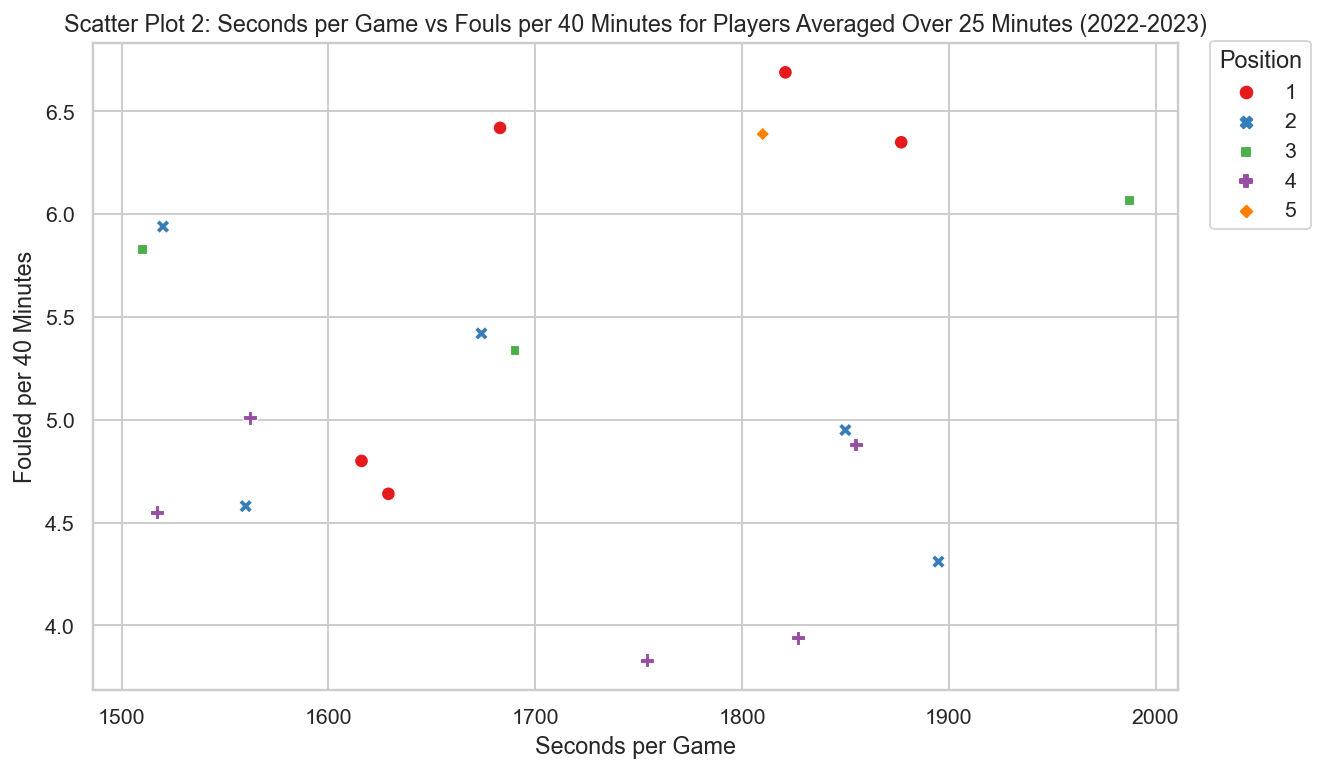

In [32]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=df_2223_over25["Seconds per Game"], 
                y=df_2223_over25["Fouled per 40 Minutes"], 
                hue=df_2223_over25["Position"],
                style=df_2223_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 2: Seconds per Game vs Fouls per 40 Minutes for Players Averaged Over 25 Minutes (2022-2023)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

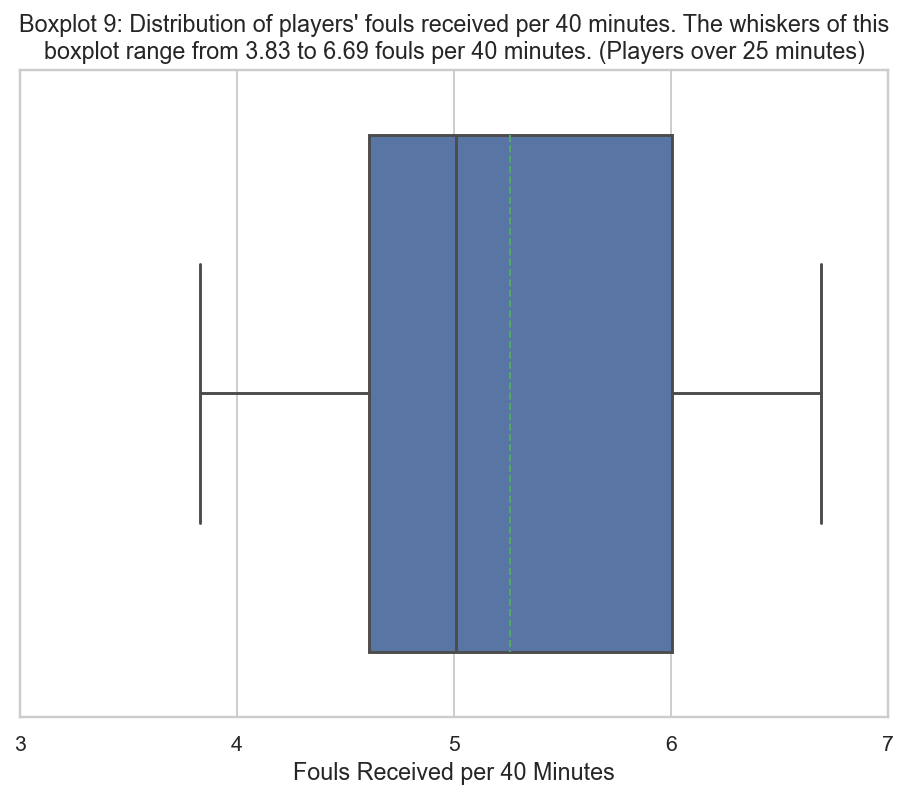

In [33]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2223_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 8, 1))
plt.title(
    "Boxplot 9: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.83 to 6.69 fouls per 40 minutes. (Players over 25 minutes)")

plt.xlabel("Fouls Received per 40 Minutes");

The range is $2.86$ fouls per 40 minutes and there is no identified outlier.

## Euroleague 2021-2022 Season: Players Over 25 Minutes on the Court

In [34]:
# Create a new df with players averaged over 25 minutes:
df_2122_over25 = df_2122[df_2122["Seconds per Game"] > 1500]

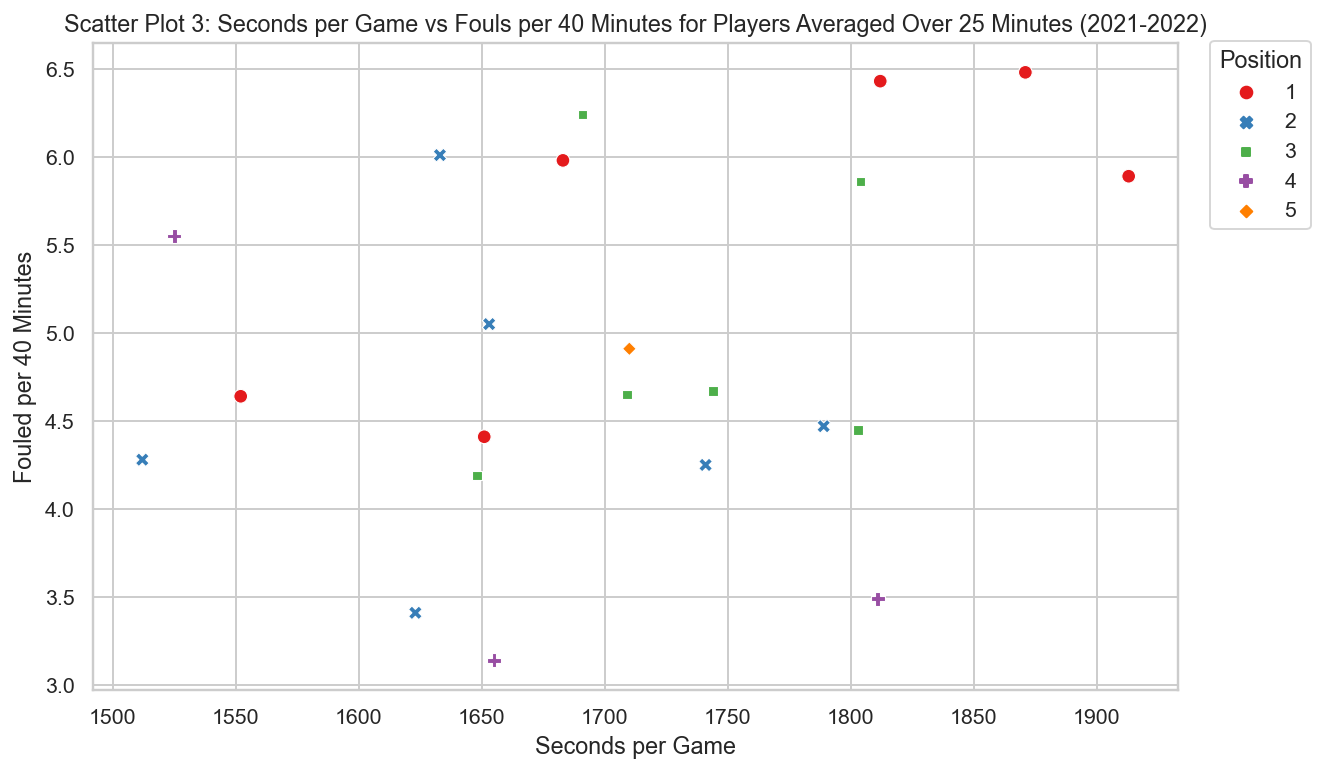

In [35]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=df_2122_over25["Seconds per Game"], 
                y=df_2122_over25["Fouled per 40 Minutes"], 
                hue=df_2122_over25["Position"],
                style=df_2122_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 3: Seconds per Game vs Fouls per 40 Minutes for Players Averaged Over 25 Minutes (2021-2022)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

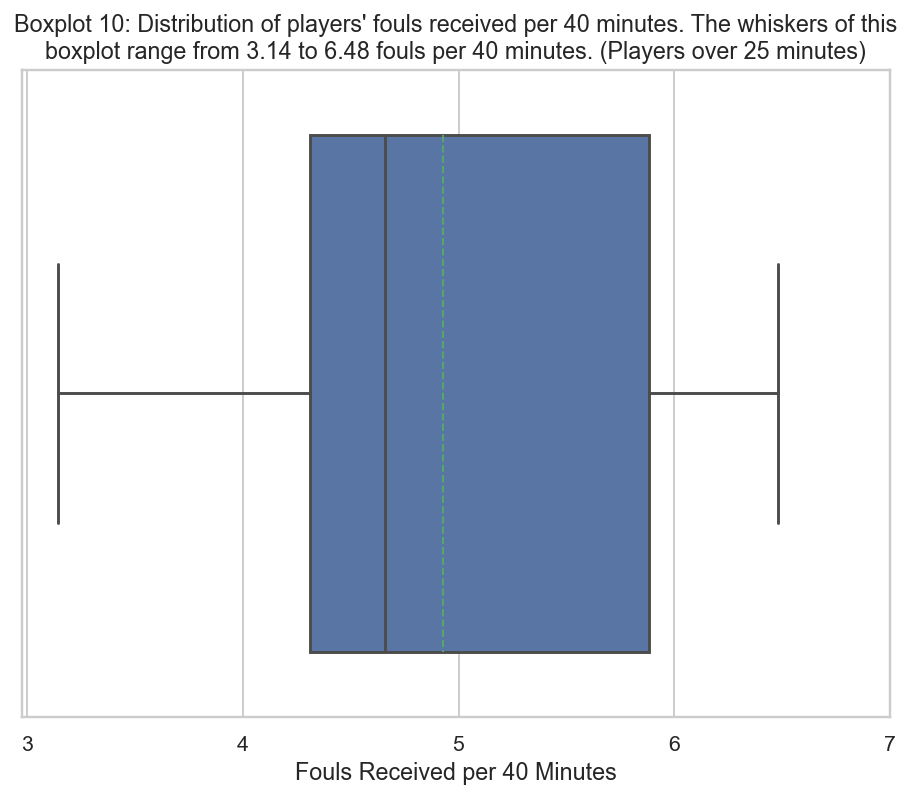

In [36]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2122_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 8, 1))
plt.title(
    "Boxplot 10: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.14 to 6.48 fouls per 40 minutes. (Players over 25 minutes)")

plt.xlabel("Fouls Received per 40 Minutes");

The range is $3.34$ fouls per 40 minutes and there is no identified outlier.

## Euroleague 2020-2021 Season: Players Over 25 Minutes on the Court

In [37]:
# Create a new df with players averaged over 25 minutes:
df_2021_over25 = df_2021[df_2021["Seconds per Game"] > 1500]

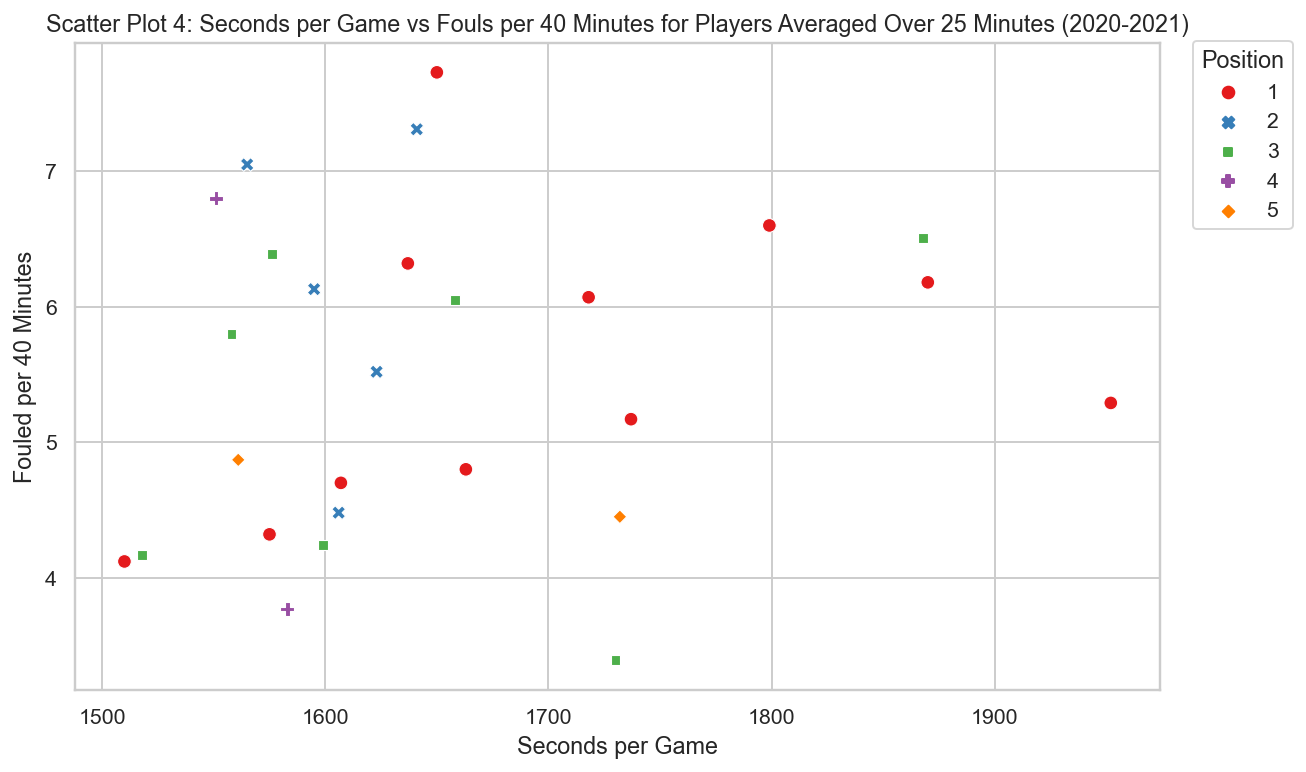

In [38]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=df_2021_over25["Seconds per Game"], 
                y=df_2021_over25["Fouled per 40 Minutes"], 
                hue=df_2021_over25["Position"],
                style=df_2021_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 4: Seconds per Game vs Fouls per 40 Minutes for Players Averaged Over 25 Minutes (2020-2021)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

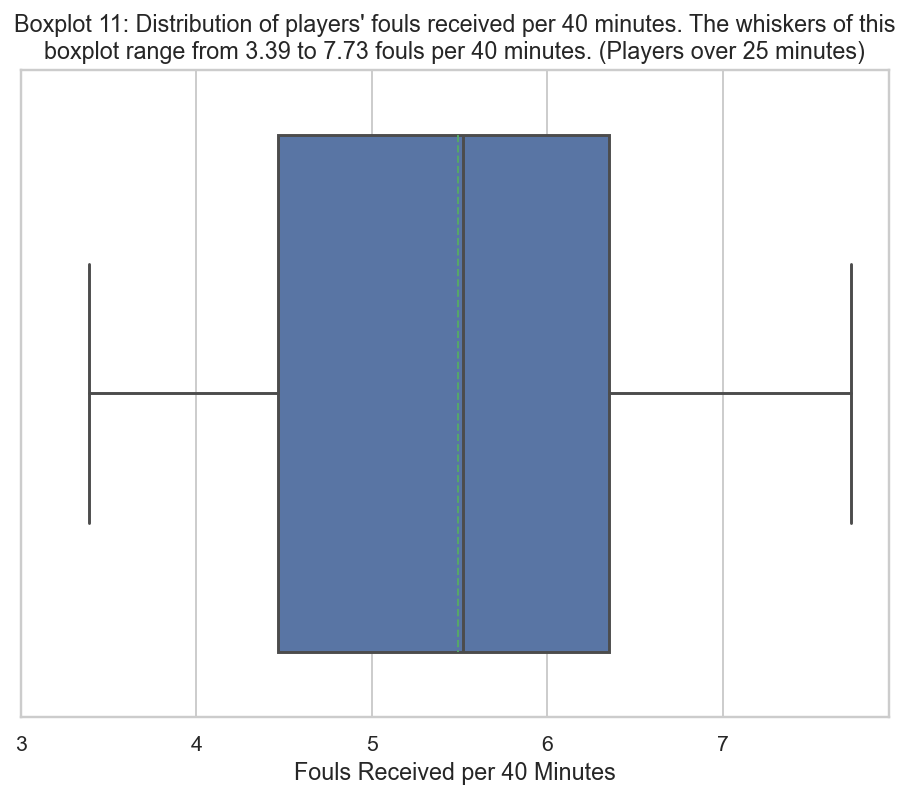

In [39]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_2021_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 8, 1))
plt.title(
    "Boxplot 11: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.39 to 7.73 fouls per 40 minutes. (Players over 25 minutes)")

plt.xlabel("Fouls Received per 40 Minutes");

The range is $4.34$ fouls per 40 minutes and there is no identified outlier.

## Euroleague 2019-2020 Season: Players Over 25 Minutes on the Court

In [40]:
# Create a new df with players averaged over 25 minutes:
df_1920_over25 = df_1920[df_1920["Seconds per Game"] > 1500]

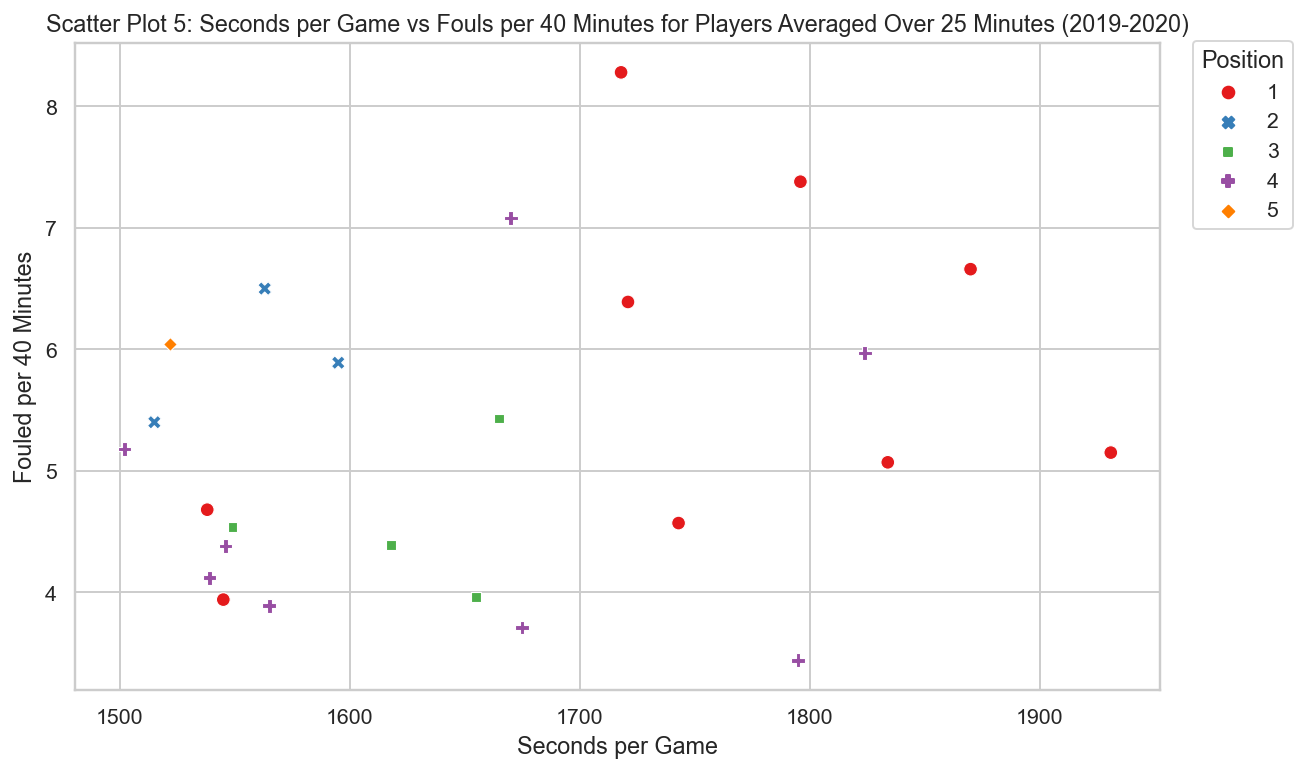

In [41]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=df_1920_over25["Seconds per Game"], 
                y=df_1920_over25["Fouled per 40 Minutes"], 
                hue=df_1920_over25["Position"],
                style=df_1920_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 5: Seconds per Game vs Fouls per 40 Minutes for Players Averaged Over 25 Minutes (2019-2020)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

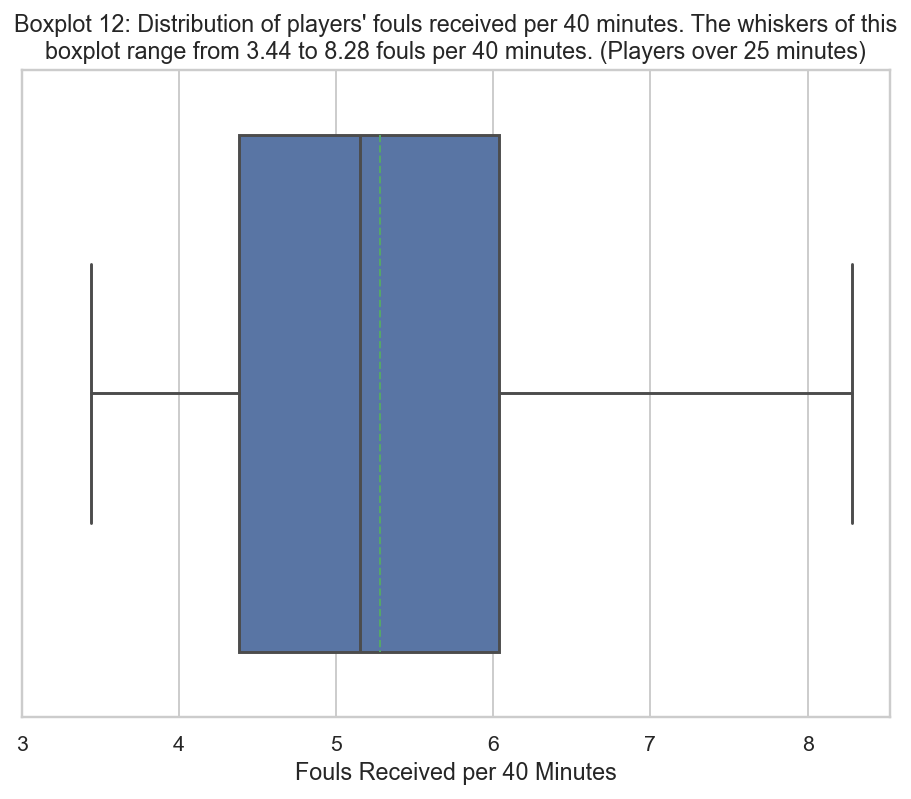

In [42]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=df_1920_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 9, 1))
plt.title(
    "Boxplot 12: Distribution of players' fouls received per 40 minutes. The whiskers of this\n"
    "boxplot range from 3.44 to 8.28 fouls per 40 minutes. (Players over 25 minutes)")

plt.xlabel("Fouls Received per 40 Minutes");

The range is $4.84$ fouls per 40 minutes and there is no identified outlier.

# Euroleague All Seasons

In [43]:
# Split the "minutes_per_game" column to two columns:
combined_df[["minutes", "seconds"]] = combined_df["Minutes per Game"].str.split("k", expand=True)

# Change the dtypes of the newly created columns:
combined_df["minutes"] = combined_df["minutes"].astype(int)
combined_df["seconds"] = combined_df["seconds"].astype(int)

# Create the final column showing the average player time per game in seconds:
combined_df["Seconds per Game"] = (combined_df["minutes"]*60 + combined_df["seconds"]).astype("int64")

# Drop the unecessary columns:
combined_df = combined_df.drop(columns=["Minutes per Game", "minutes", "seconds"])

# Normalize fouls per game by creating the "fouls per game" column:
combined_df["Fouled per Game"] = combined_df["Fouled (Total)"] / combined_df["Games"]

# Normalize fouls per 40 minutes (2400 seconds) by creating the "fouls per 40 mins" column:
combined_df["Fouled per 40 Minutes"] = round(2400 * combined_df["Fouled per Game"] / combined_df["Seconds per Game"], 2)

In [44]:
# Present some basic statistics of the df:
combined_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fouled (Total),250.0,108.004000,30.161479,66.000000,88.000000,102.000000,122.75000,274.000000
Games,250.0,32.160000,5.105159,18.000000,28.000000,33.000000,36.00000,41.000000
Position,250.0,2.824000,1.518634,1.000000,1.000000,3.000000,4.00000,5.000000
Seconds per Game,250.0,1482.344000,233.292949,813.000000,1326.750000,1487.500000,1653.00000,1987.000000
Fouled per Game,250.0,3.380588,0.822896,2.108108,2.730769,3.197198,3.84689,6.682927
Fouled per 40 Minutes,250.0,5.528920,1.236720,3.140000,4.572500,5.425000,6.32750,9.100000


In [45]:
# Select the numerical columns:
num_cols_comb = combined_df.select_dtypes(include=["int64", "float64"])

# Display a correlation matrix for the numerical columns:
num_cols_comb.corr()

,Fouled (Total),Games,Position,Seconds per Game,Fouled per Game,Fouled per 40 Minutes
Fouled (Total),1.000000,0.430999,-0.118789,0.390698,0.804160,0.543692
Games,0.430999,1.000000,0.106731,-0.005971,-0.171052,-0.191525
Position,-0.118789,0.106731,1.000000,-0.249280,-0.197611,-0.011200
Seconds per Game,0.390698,-0.005971,-0.249280,1.000000,0.442286,-0.286093
Fouled per Game,0.804160,-0.171052,-0.197611,0.442286,1.000000,0.720437
Fouled per 40 Minutes,0.543692,-0.191525,-0.011200,-0.286093,0.720437,1.000000


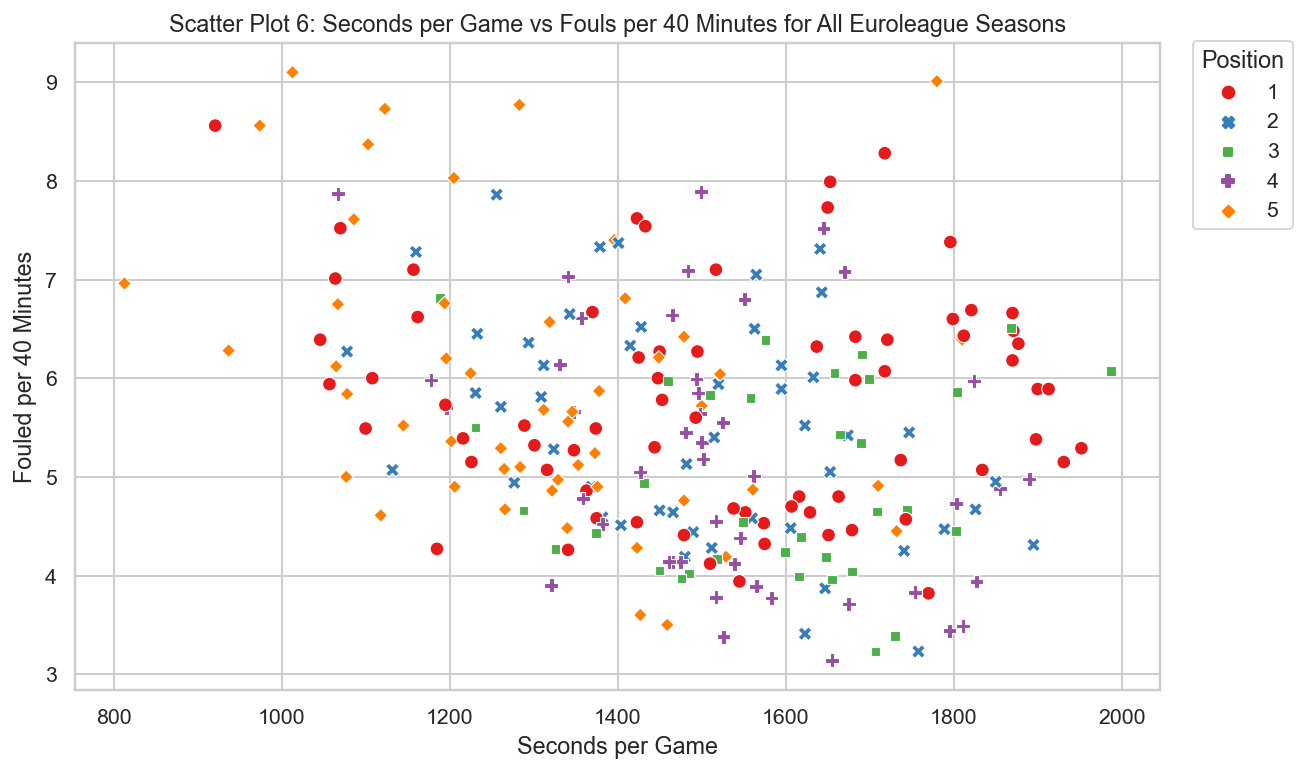

In [46]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=combined_df["Seconds per Game"], 
                y=combined_df["Fouled per 40 Minutes"], 
                hue=combined_df["Position"],
                style=combined_df["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 6: Seconds per Game vs Fouls per 40 Minutes for All Euroleague Seasons")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

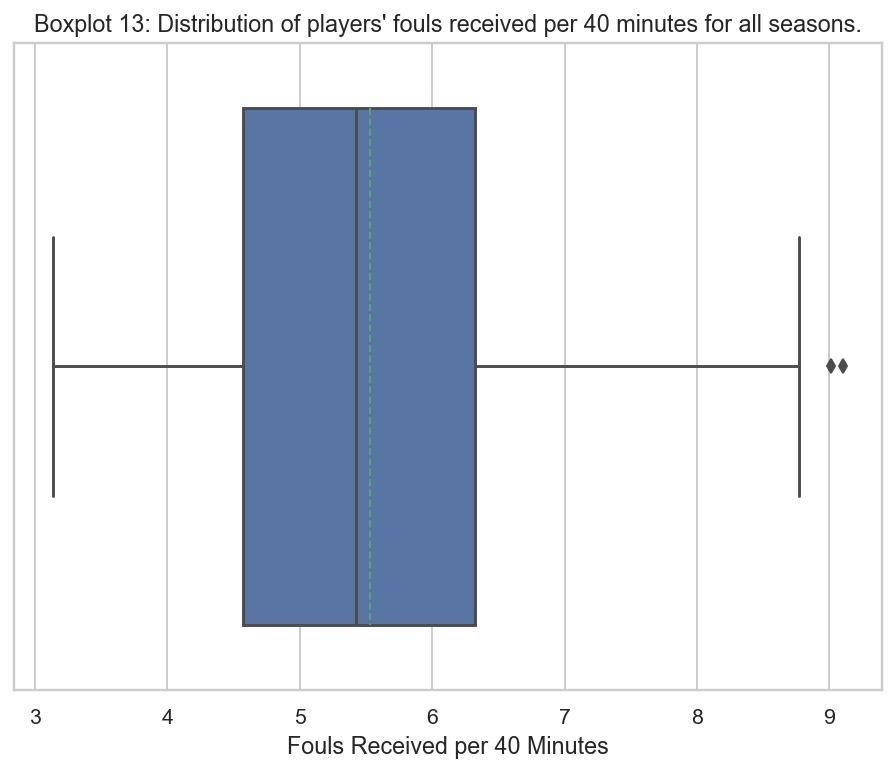

In [47]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=combined_df["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title("Boxplot 13: Distribution of players' fouls received per 40 minutes for all seasons.")

plt.xlabel("Fouls Received per 40 Minutes");

## Euroleague All Seasons: Players Over 25 Minutes on the Court

In [48]:
# Create a new df with players averaged over 25 minutes:
combined_df_over25 = combined_df[combined_df["Seconds per Game"] > 1500]

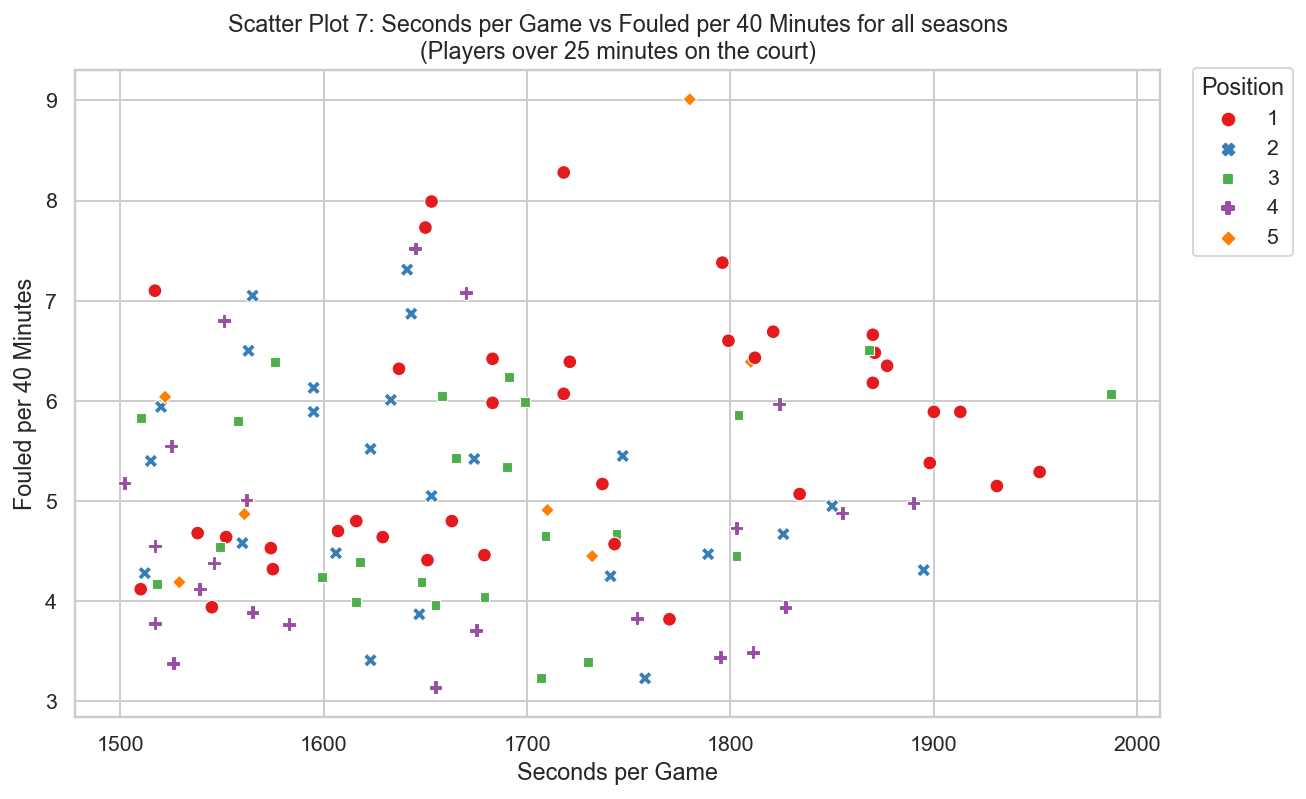

In [49]:
# Create the figure and set its size and dpi:
plt.figure(figsize=(10, 6), dpi=140)

# Create the scatter plot:
sns.scatterplot(x=combined_df_over25["Seconds per Game"], 
                y=combined_df_over25["Fouled per 40 Minutes"], 
                hue=combined_df_over25["Position"],
                style=combined_df_over25["Position"],
                s=50,
               palette="Set1")

# Set title and legend:
plt.title("Scatter Plot 7: Seconds per Game vs Fouled per 40 Minutes for all seasons\n"
         "(Players over 25 minutes on the court)")
plt.legend(title='Position', bbox_to_anchor=(1.02, 1.02), loc='upper left');

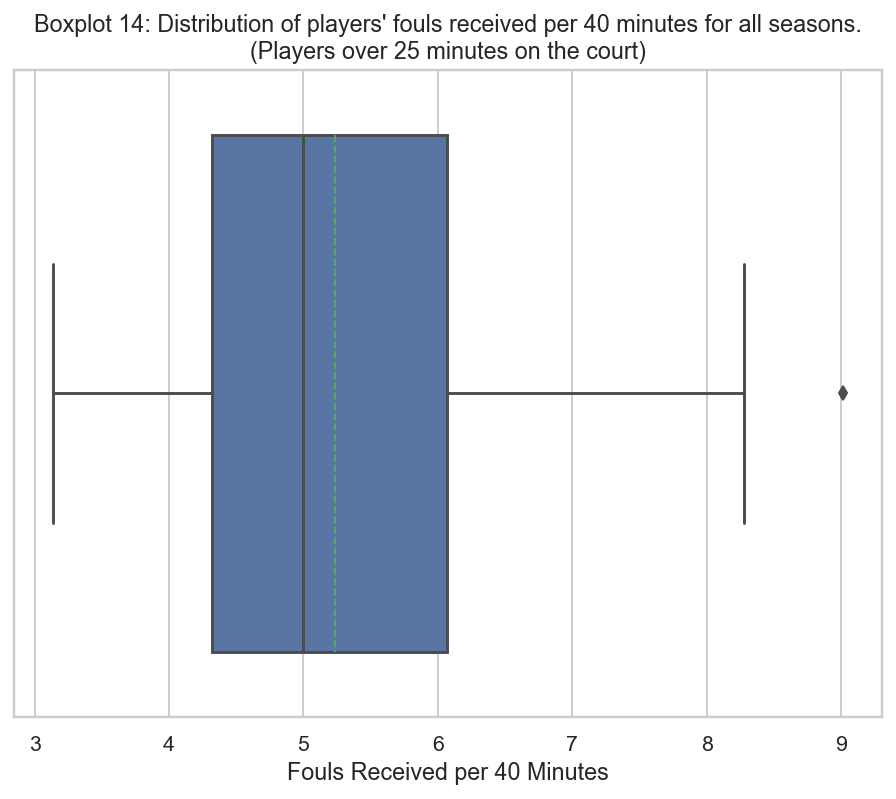

In [50]:
# Create the boxplot's grid:
sns.set(style="whitegrid")

# Create the figure and set its size and dpi:
plt.figure(figsize=(8, 6), dpi=140)

# Create the boxplot showing the mean of the distribution:
sns.boxplot(x=combined_df_over25["Fouled per 40 Minutes"], showmeans=True, meanline=True)

# Set the x-axis ticks, boxplot's title and labels:
plt.xticks(range(3, 10, 1))
plt.title("Boxplot 14: Distribution of players' fouls received per 40 minutes for all seasons.\n"
    "(Players over 25 minutes on the court)")

plt.xlabel("Fouls Received per 40 Minutes");

## Two Sample T-Hypothesis Test

Assumptions:  
$1)$ The population's variance is unknown. The data of 2016-2017, 2017-2018 and 2018-2019 seasons are not yet prepared.  
$2)$ The sample size, $n$ is equal to $4$ (4 seasons) and hence $n<30$.  
$3)$ There is a single population. 

In [51]:
# Create a list with historical observations:
historical_dfs = [df_1920, df_2021, df_2122, df_2223]

# Create a list with seasons of the observations:
seasons = ["2019-2020", "2020-2021", "2021-2022", "2022-2023"]

# Iterate through historical_dfs and calculate the mean for each season:
list_of_seasons = []
for df in historical_dfs:  
    season_mean = df["Fouled per 40 Minutes"].mean()  
    list_of_seasons.append(season_mean)

# Create the hypothesis df format:
df_hypothesis = pd.DataFrame({"Season": seasons,
                              "Fouled per 40 Minutes": list_of_seasons
    
})

# Assign the degrees of freedom and the sample size to a variable:
n = 4
deg_fr = n -1

# Calculate the mean and the standard deviation of all seasons:
x, s = df_hypothesis["Fouled per 40 Minutes"].aggregate(["mean", "std"])

# Assign the mean of 2023-2024 season to μ:
μ_0 = df_2324["Fouled per 40 Minutes"].mean()

# Calculate the standard error:
standard_error = s / (n**0.5)

### Null and Alternative Hypothesis
The null hypothesis is that the mean of the season 2023-2024, $μ_0$, is not significantly smaller than the historical mean of the other seasons combined. This means:
$$H_0: μ - μ_0 = 0$$  
The alternative hypothesis is that the mean of the season 2023-2024, $μ_0$, is significantly smaller than the historical mean of the other seasons combined. This means:
$$H_1: μ - μ_0 > 0$$  

In [52]:
# Calculate T-Score:
t_score = round((x - μ_0) / standard_error, 2)
print("T-Score:", t_score)

# Calculate p-value for an one-tailed test:
p = round(1 - t.cdf(t_score, deg_fr), 2)
print("p-Value:", p)

T-Score: 0.12
p-Value: 0.46


<div style="text-align: justify">
Since p value is greater than any of the common α values, we fail to reject the null hypothesis. This indicates that, despite the fact that the mean of 2023-2024 season is smaller than the historical mean, this difference should not be considered statistically significant. Therefore, the test above does not provide sufficient evidence to reject the null hypothesis.
</div>